# Logistic regression for banking predictions   


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv", sep = ";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] = (data["y"] == "yes").astype(int)

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])



In [10]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [12]:
data.groupby("y").mean()

C:\Users\Alanr\AppData\Local\Temp/ipykernel_5756/3574081688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("y").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

C:\Users\Alanr\AppData\Local\Temp/ipykernel_5756/3637113592.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("education").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


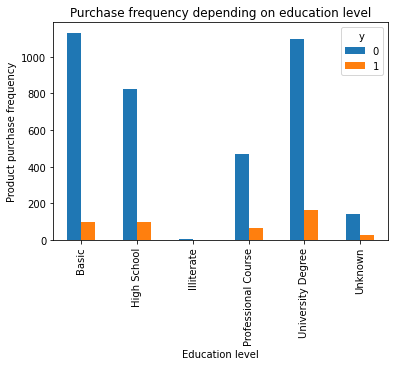

In [14]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Purchase frequency depending on education level")
plt.xlabel("Education level")
plt.ylabel("Product purchase frequency")
plt.show()

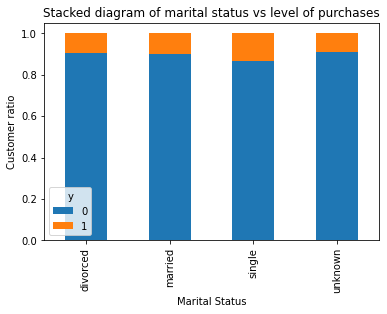

In [15]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked=True)
plt.title("Stacked diagram of marital status vs level of purchases")
plt.xlabel("Marital Status")
plt.ylabel("Customer ratio")
plt.show()

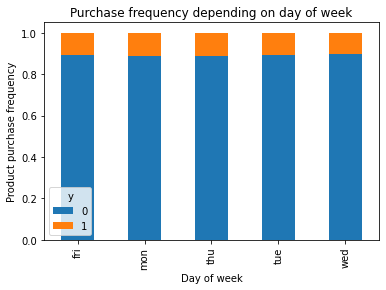

In [16]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Purchase frequency depending on day of week")
plt.xlabel("Day of week")
plt.ylabel("Product purchase frequency")
plt.show()

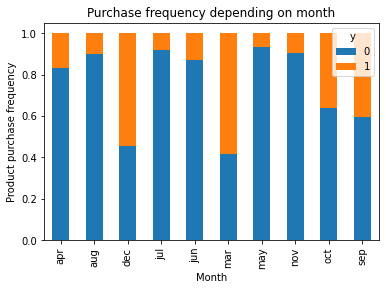

In [17]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Purchase frequency depending on month")
plt.xlabel("Month")
plt.ylabel("Product purchase frequency")
plt.show()

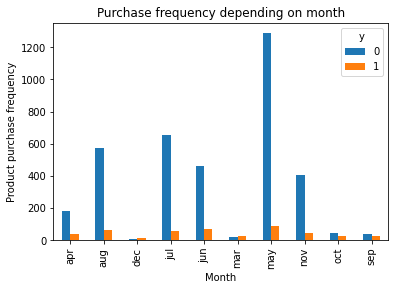

In [18]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Purchase frequency depending on month")
plt.xlabel("Month")
plt.ylabel("Product purchase frequency")
plt.show()

Text(0, 0.5, 'Customer')

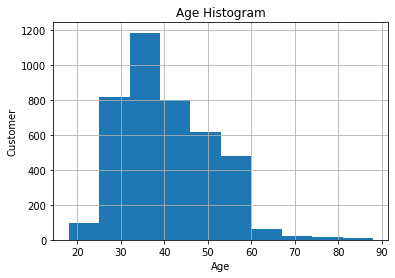

In [19]:
%matplotlib inline
data.age.hist()
plt.title("Age Histogram")
plt.xlabel("Age")  
plt.ylabel("Customer")

<AxesSubplot: xlabel='age'>

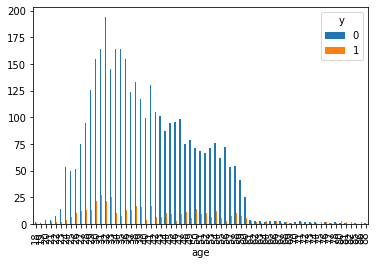

In [20]:
pd.crosstab(data.age, data.y).plot(kind = "bar")

<AxesSubplot: xlabel='poutcome'>

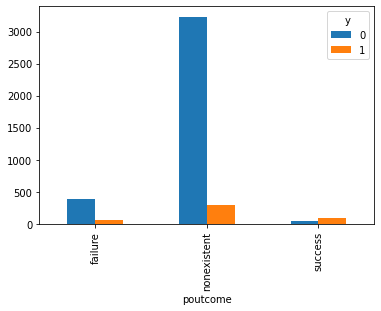

In [21]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar")

### Conversión of categorical variables to dummies

In [22]:
categories = ["job", "marital", "education", "default", "housing", "loan",
               "contact", "month", "day_of_week", "poutcome"]

for category in categories:
    cat_list = "Cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix = cat_list)
    data = data.join(cat_dummies)



In [23]:
data_vars = data.columns.values.tolist()

In [24]:
to_keep = [v for v in data_vars if v not in categories]

In [25]:
bank_data = data[to_keep]
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,Cat_month_oct,Cat_month_sep,Cat_day_of_week_fri,Cat_day_of_week_mon,Cat_day_of_week_thu,Cat_day_of_week_tue,Cat_day_of_week_wed,Cat_poutcome_failure,Cat_poutcome_nonexistent,Cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [26]:
Y = ["y"]
X = [v for v in to_keep if v not in Y]

### Selection of features for the model

In [27]:
n = 12

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()


In [30]:
rfe = RFE(lr, n_features_to_select=n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

c:\Users\Alanr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Alanr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [31]:
print(rfe.support_)

[False False False False False False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True False False
  True  True  True False False False False False False False  True  True
  True]


In [32]:
print(rfe.ranking_)

[27 38 14 45 47  9 21 19  1 33 16  2  1 42  3 30  1 39 44 20 12 43 15 31
 26 49 24 10 48 17 29  7 32 23 50 11 18 46 13  6 28  4  8  1  1  1 22  5
  1  1  1 41 40 37 36 25 35 34  1  1  1]


In [33]:
list(zip(X, rfe.support_, rfe.ranking_))

[('age', False, 27),
 ('duration', False, 38),
 ('campaign', False, 14),
 ('pdays', False, 45),
 ('previous', False, 47),
 ('emp.var.rate', False, 9),
 ('cons.price.idx', False, 21),
 ('cons.conf.idx', False, 19),
 ('euribor3m', True, 1),
 ('nr.employed', False, 33),
 ('Cat_job_admin.', False, 16),
 ('Cat_job_blue-collar', False, 2),
 ('Cat_job_entrepreneur', True, 1),
 ('Cat_job_housemaid', False, 42),
 ('Cat_job_management', False, 3),
 ('Cat_job_retired', False, 30),
 ('Cat_job_self-employed', True, 1),
 ('Cat_job_services', False, 39),
 ('Cat_job_student', False, 44),
 ('Cat_job_technician', False, 20),
 ('Cat_job_unemployed', False, 12),
 ('Cat_job_unknown', False, 43),
 ('Cat_marital_divorced', False, 15),
 ('Cat_marital_married', False, 31),
 ('Cat_marital_single', False, 26),
 ('Cat_marital_unknown', False, 49),
 ('Cat_education_Basic', False, 24),
 ('Cat_education_High School', False, 10),
 ('Cat_education_Illiterate', False, 48),
 ('Cat_education_Professional Course', False, 

In [34]:
cols = ["euribor3m", 'Cat_job_entrepreneur', 'Cat_job_self-employed', 'Cat_month_apr', 'Cat_month_aug','Cat_month_dec', 'Cat_month_mar', 'Cat_month_may', 'Cat_month_nov',
        'Cat_poutcome_failure', 'Cat_poutcome_nonexistent', 'Cat_poutcome_success']

In [35]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementation of the model in Python with statdsmodel.api

In [36]:
import statsmodels.api as sm

In [37]:
logit_model = sm.Logit(Y, X)

In [38]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.276950
         Iterations 7


In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit              Pseudo R-squared:   0.198      
Dependent Variable:    y                  AIC:                2305.5137  
Date:                  2023-09-24 20:15   BIC:                2381.3940  
No. Observations:      4119               Log-Likelihood:     -1140.8    
Df Model:              11                 LL-Null:            -1422.9    
Df Residuals:          4107               LLR p-value:        5.9259e-114
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        7.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
euribor3m                -0.5110   0.0364 -14.0269 0.0000 -0.5824 -0.4396
Cat_job_entrepreneur     -0.3525   0.3784  -0.9317 0.3515 -1.0942  0.3891
Cat_job_self-employed    -0.3917   0.3239  -1.2092 0.2266 -1.0266  0.2432
Cat_month_apr            -0.7634   0.2164  -3.5275 0.0004 -1.1876 -0.3392
Cat_month_aug            -0.3061   0.1737  -1.7627 0.0780 -0.6466  0.0343
Cat_month_dec             0.5558   0.4733   1.1743 0.2403 -0.3719  1.4834
Cat_month_mar             0.9573   0.3276   2.9220 0.0035  0.3152  1.5994
Cat_month_may            -1.2186   0.1498  -8.1354 0.0000 -1.5122 -0.9250
Cat_month_nov            -0.5391   0.2002  -2.6929 0.0071 -0.9315 -0.1467
Cat_poutcome_failure     -0.4055   0.1783  -2.2747 0.0229 -0.7550 -0.0561
Cat_poutcome_nonexistent -0.1402   0.1556  -0.9014 0.3674 -0.4451  0.1647
Cat_poutcome_success      1.5119   0.2089   7.2389 0.0000  1.1025  1.9212
=========================================================================

"""

### Implementation of the model in Python with scikit-learn

In [40]:
from sklearn import linear_model

In [41]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [42]:
logit_model.score(X,Y)

0.9009468317552805

In [43]:
1-Y.mean()

0.8905074047098811

In [44]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,euribor3m,[-0.5121141762462201]
1,Cat_job_entrepreneur,[-0.31694190600922284]
2,Cat_job_self-employed,[-0.34671072091367205]
3,Cat_month_apr,[-0.7311248404796886]
4,Cat_month_aug,[-0.286224153304847]
5,Cat_month_dec,[0.4647301435479661]
6,Cat_month_mar,[0.880996434957247]
7,Cat_month_may,[-1.1946389559670068]
8,Cat_month_nov,[-0.5102060480769001]
9,Cat_poutcome_failure,[-0.7062888269417904]


The coefficients of the variable indicate the changes on a logarithmic scale (odds ratio) for each unit of change in the variable.
If euribor3m increases by one unit, the logarithm of the odds ratio will decrease by 0.5121141 and therefore, the probability of purchase will decrease accordingly.

## Logistics Model Validation

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [47]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [48]:
from IPython.display import Math, display, Latex

In [49]:
display(Math(r'Y_p = \begin{cases} 0 & if\ p\ \leq 0.5 \\ 1 & if\ p>0.5 \end{cases}'))

<IPython.core.display.Math object>

In [50]:
probs = lm.predict_proba(X_test)

In [51]:
probs # probability (how sure I am of the value), probability of the output value

array([[0.93643255, 0.06356745],
       [0.8818881 , 0.1181119 ],
       [0.93336583, 0.06663417],
       ...,
       [0.69184687, 0.30815313],
       [0.97943823, 0.02056177],
       [0.19771856, 0.80228144]])

In [52]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

Sometimes we will be interested in defining a threshold ourselves.

In [53]:
display(Math(r'\varepsilon \in (0,1), Y_p = \begin{cases} 0 & if\ p\ \leq \varepsilon \\ 1 & if\ p>\varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [54]:
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.063567,0
1,0.118112,1
2,0.066634,0
3,0.063661,0
4,0.057880,0


In [55]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,863
1,373


In [56]:
373/(len(prob_df))

0.3017799352750809

In [57]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,1035
1,201


In [58]:
201/(len(prob_df))

0.16262135922330098

In [59]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,426
1,810


In [60]:
810/(len(prob_df))

0.6553398058252428

In [61]:
from sklearn import metrics

In [62]:
metrics.accuracy_score(Y_test, prediction)

0.9053398058252428

## Cross-validation

### K-Fold Validation
The data set begins by dividing into k partitions, of those k partitions, 1 will be used as a testing set while the other k-1, all of them together, will be used as a training set. This process will be repeated k times, each of the partitions will be used once as a test, therefore, all of them will have acted once as a test set. For each of the iterations the effectiveness of the model will be measured, there will be k levels of effectiveness and we can average the total effectiveness of the model.

If the overall efficiency of the model does not appear to vary much and the average efficiency is close to the efficiency numbers calculated independently during each iteration or calculated in the standard way (some percentage for training and the rest for testing), then can confirm that the model makes a good generalization.




In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv = 8)

In [65]:
scores

array([0.9184466 , 0.90291262, 0.89126214, 0.90679612, 0.89514563,
       0.88349515, 0.90097087, 0.89688716])

In [66]:
scores.mean()

0.8994895357183332

# Confusion matrices and ROC curves

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [68]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [69]:
probs = lm.predict_proba(X_test)

In [70]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df

,0,prediction,actual
0,0.063567,0,0
1,0.118112,1,0
2,0.066634,0,0
3,0.063661,0,0
4,0.057880,0,0
...,...,...,...
1231,0.063661,0,0
1232,0.063599,0,0
1233,0.308153,1,0
1234,0.020562,0,0


In [71]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [72]:
confusion_matrix

actual,0,1
prediction,,
0,821,42
1,293,80


In [73]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [74]:
sensitivity = TP/(TP+FN)
sensitivity

0.21447721179624665

In [75]:
specificity_1 = 1-TN/(TN+FP)
specificity_1

0.04866743916570104

In [85]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
specificities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0] > t, 1, 0)
    prob_df["actual"] = list(Y_test)
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sensitivities.append(TP/(TP+FN))
    specificities_1.append(1-TN/(TN+FP))

sensitivities.append(0)
specificities_1.append(0)


When the threshold increases, both the sensitivity and 1-specificity decrease

In [86]:
sensitivities

[1,
 0.9590163934426229,
 0.8770491803278688,
 0.6639344262295082,
 0.6557377049180327,
 0.5983606557377049,
 0.5327868852459017,
 0.45901639344262296,
 0.45081967213114754,
 0.4180327868852459,
 0.4016393442622951,
 0.18032786885245902,
 0.1557377049180328,
 0]

In [87]:
specificities_1

[1,
 0.7675044883303411,
 0.6310592459605027,
 0.2719928186714542,
 0.26301615798922806,
 0.18222621184919208,
 0.12208258527827653,
 0.08797127468581689,
 0.08707360861759428,
 0.07899461400359065,
 0.06642728904847395,
 0.016157989228007152,
 0.012567324955116699,
 0]

In [79]:
import matplotlib.pyplot as plt

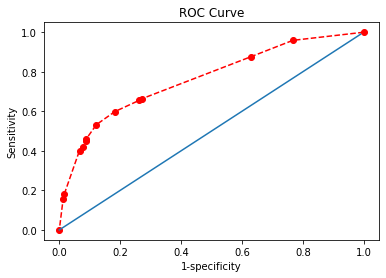

In [88]:
%matplotlib inline
plt.plot(specificities_1, sensitivities, marker = "o", linestyle = "--", color = "r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-specificity")
plt.ylabel("Sensitivity")
plt.title("ROC Curve")
plt.show()

The diagonal is the worst model and any curve above the diagonal is a better predictor than a random choice. Having a ROC curve below the diagonal is worse than flipping a coin.

In [94]:
pip install plotnine

  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/eb/c1/fcc5985eee6511aa321e68c8f813d9fdbe1b506713a95d4f612a5f963270/plotnine-0.12.3-py3-none-any.whl.metadata
  Using cached plotnine-0.12.3-py3-none-any.whl.metadata (8.9 kB)Note: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for mizani<0.10.0,>0.9.0 from https://files.pythonhosted.org/packages/e2/95/d4e33d3f5bc9fee5512637661208b6b595bda58e9b6a66fa867137761dd7/mizani-0.9.3-py3-none-any.whl.metadata
  Using cached mizani-0.9.3-py3-none-any.whl.metadata (4.6 kB)
Using cached plotnine-0.12.3-py3-none-any.whl (1.3 MB)
Using cached mizani-0.9.3-py3-none-any.whl (73 kB)


In [95]:
from sklearn import metrics
from pandas import Timestamp
import plotnine as p9

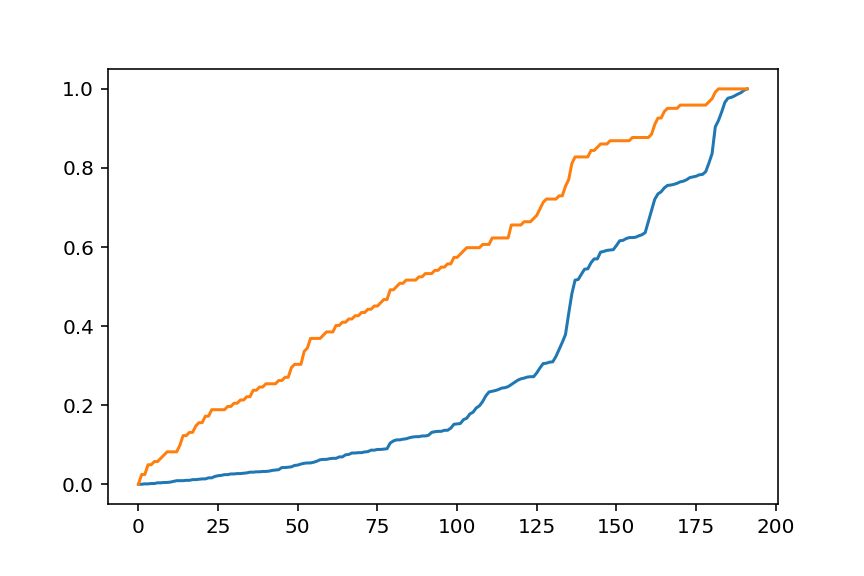

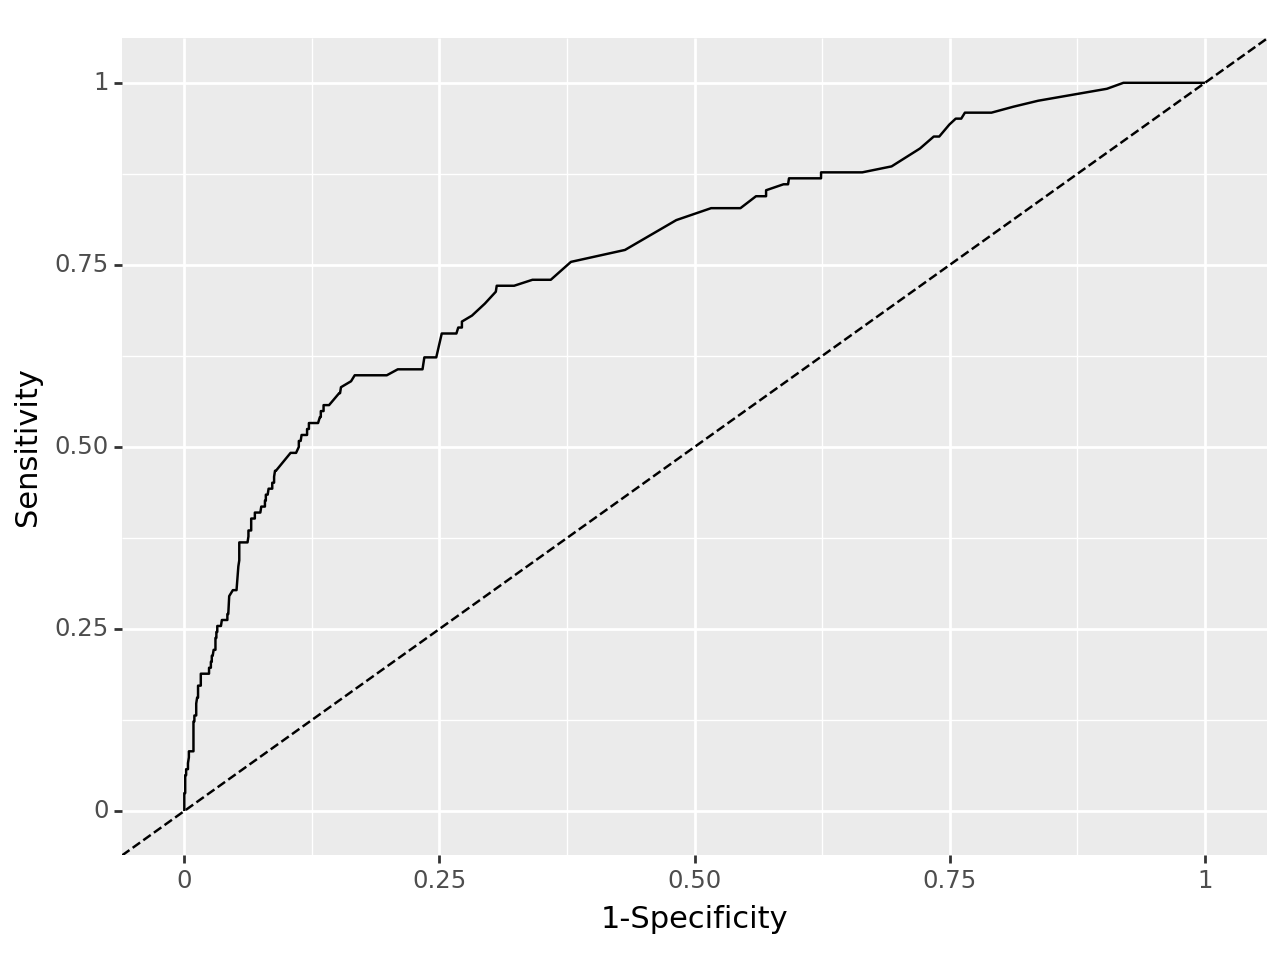

<Figure Size: (640 x 480)>

In [96]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame({
"esp":espc_1,
"sens":sensit
})
df.head()
plt.plot(df, )

p9.ggplot(df, p9.aes(x="esp", y="sens")) +p9.geom_line() + p9.geom_abline(linetype="dashed")+p9.xlim(-0.01,1.01)+p9.ylim(-0.01,1.01)+p9.xlab("1-Specificity")+p9.ylab("Sensitivity")

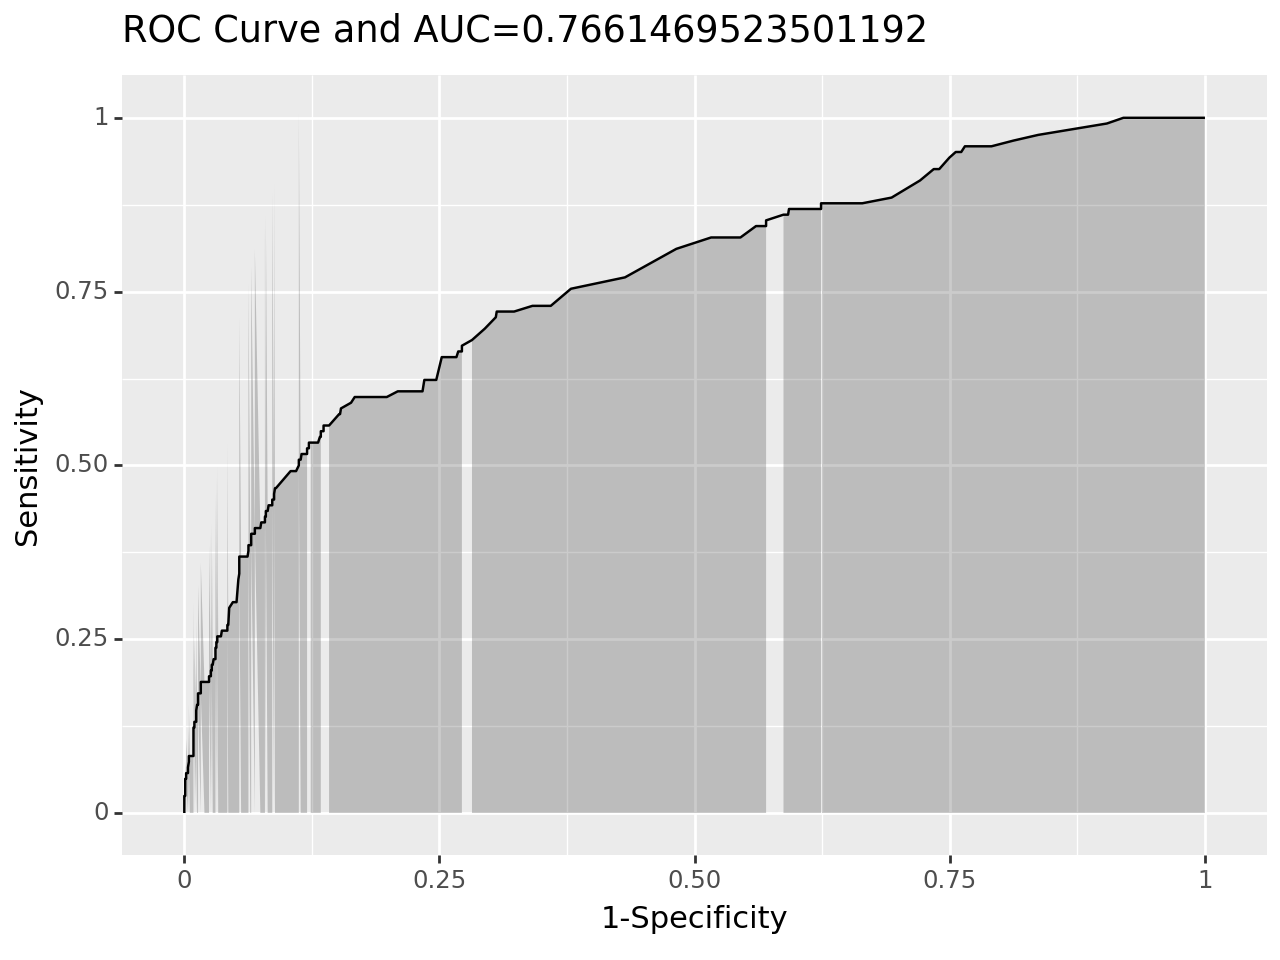

<Figure Size: (640 x 480)>

In [100]:
auc = metrics.auc(espc_1, sensit)

p9.ggplot(df, p9.aes(x="esp", y="sens")) + p9.geom_area(alpha=0.25)+p9.geom_line(p9.aes(y="sens"))+p9.ggtitle("ROC Curve and AUC=%s"%str(auc))+p9.xlim(-0.01,1.01)+p9.ylim(-0.01,1.01)+p9.xlab("1-Specificity")+p9.ylab("Sensitivity")